In [25]:
import numpy as np
import pandas as pd
import mlrose
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 8 QUEENS PROBLEM
# Define fitness function for maximization problem
# towardsdatascience.com/getting-started-with-randomized-optimization-in-python-f7df46babff0
def queens_max(state):
    
    # Initialize counter
    fitness = 0
    
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):
                
                # If no attacks, then increment counter
                fitness += 1

    return fitness

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

In [5]:
problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness_cust,
                             maximize = True, max_val = 8)

The best state found with 10 step attempts took 136 iterations.
The fitness found at the best state with max of 10 step attempts is:  26.0
The best state found with 20 step attempts took 202 iterations.
The fitness found at the best state with max of 20 step attempts is:  26.0
The best state found with 30 step attempts took 515 iterations.
The fitness found at the best state with max of 30 step attempts is:  28.0
The best state found with 50 step attempts took 535 iterations.
The fitness found at the best state with max of 50 step attempts is:  28.0
The best state found with 100 step attempts took 585 iterations.
The fitness found at the best state with max of 100 step attempts is:  28.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


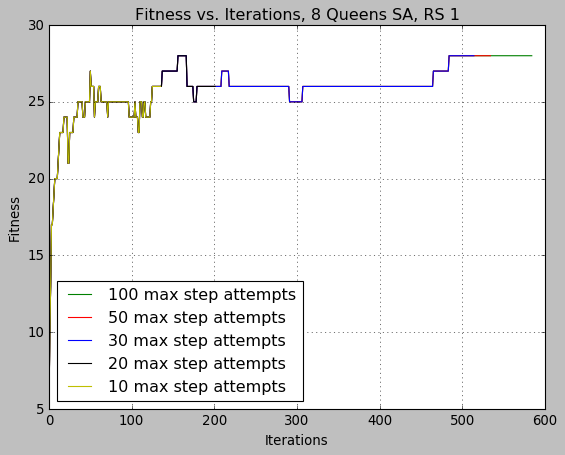

In [110]:
# 8Q SA
# Define decay schedule for Simulated Annealing
schedule = mlrose.ExpDecay()

# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Solve problem using simulated annealing
step_attempts = [10, 20, 30, 50, 100]
all_curve = []
for a in step_attempts:
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = a, max_iters = 5000,
                                                      init_state = init_state, curve = True, random_state = 1)
    all_curve.append(fitness_curve)
    print('The best state found with {} step attempts took {} iterations.'.format(a, len(fitness_curve)))
    print('The fitness found at the best state with max of {} step attempts is: '.format(a), best_fitness)

plt.style.use('classic')
plt.plot(all_curve[4], color='green', label='100 max step attempts')
plt.plot(all_curve[3], color = 'red', label='50 max step attempts')
plt.plot(all_curve[2], color='blue', label='30 max step attempts')
plt.plot(all_curve[1], color = 'black', label='20 max step attempts')
plt.plot(all_curve[0], color='y', label='10 max step attempts')
plt.legend(loc='best')
ax=plt.axes()
ax.grid()
plt.title('Fitness vs. Iterations, 8 Queens SA, RS 1')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig("Q8_SA_RS1")

The best state found with 10 step attempts took 105 iterations.
The fitness found at the best state with max of 10 step attempts is:  26.0
The best state found with 20 step attempts took 137 iterations.
The fitness found at the best state with max of 20 step attempts is:  27.0
The best state found with 30 step attempts took 194 iterations.
The fitness found at the best state with max of 30 step attempts is:  27.0
The best state found with 50 step attempts took 284 iterations.
The fitness found at the best state with max of 50 step attempts is:  27.0
The best state found with 100 step attempts took 525 iterations.
The fitness found at the best state with max of 100 step attempts is:  28.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


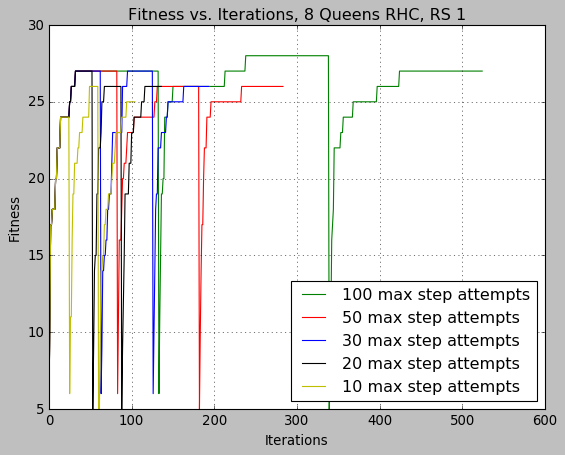

In [114]:
# 8Q RHC
step_attempts = [10, 20, 30, 50, 100]
all_curve = []
for a in step_attempts:
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem,
                                                      max_attempts = a, max_iters = 5000, restarts = 2,
                                                      init_state = init_state, curve = True, random_state = 3)
    all_curve.append(fitness_curve)
    print('The best state found with {} step attempts took {} iterations.'.format(a, len(fitness_curve)))
    print('The fitness found at the best state with max of {} step attempts is: '.format(a), best_fitness)

plt.style.use('classic')
plt.plot(all_curve[4], color='green', label='100 max step attempts')
plt.plot(all_curve[3], color = 'red', label='50 max step attempts')
plt.plot(all_curve[2], color='blue', label='30 max step attempts')
plt.plot(all_curve[1], color = 'black', label='20 max step attempts')
plt.plot(all_curve[0], color='y', label='10 max step attempts')
plt.legend(loc='best')
ax = plt.axes()
ax.grid()
plt.title('Fitness vs. Iterations, 8 Queens RHC, RS 1')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig("Q8_RHC")

The best state found with 10 step attempts took 11 iterations.
The fitness found at the best state with max of 10 step attempts is:  26.0
The best state found with 20 step attempts took 21 iterations.
The fitness found at the best state with max of 20 step attempts is:  26.0
The best state found with 40 step attempts took 41 iterations.
The fitness found at the best state with max of 40 step attempts is:  26.0
The best state found with 80 step attempts took 132 iterations.
The fitness found at the best state with max of 80 step attempts is:  27.0
The best state found with 160 step attempts took 212 iterations.
The fitness found at the best state with max of 160 step attempts is:  27.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


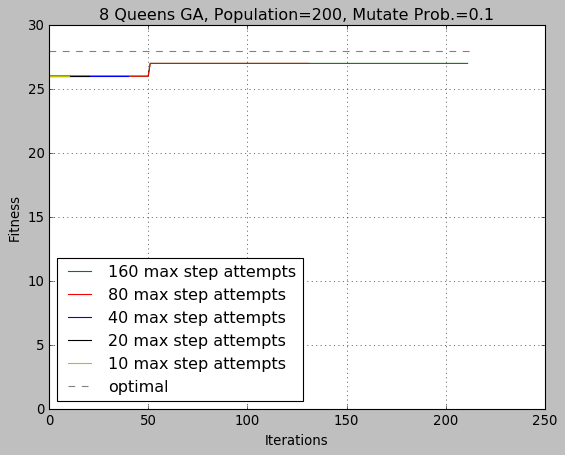

In [161]:
# 8Q GA
step_attempts = [10, 20, 40, 80, 160]
length = 0
p_size = [100, 200, 400]
mut_prob = [0.05, 0.1, 0.15, 0.2]
all_curve = []
for a in step_attempts:
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = p_size[1], mutation_prob = mut_prob[1],
                                                      max_attempts = a, max_iters = 5000,
                                                      curve = True, random_state = 1)
    all_curve.append(fitness_curve)
    print('The best state found with {} step attempts took {} iterations.'.format(a, len(fitness_curve)))
    print('The fitness found at the best state with max of {} step attempts is: '.format(a), best_fitness)
    if len(fitness_curve) > length:
        length = len(fitness_curve)

plt.style.use('classic')
plt.plot(all_curve[4], color='green', label='160 max step attempts')
plt.plot(all_curve[3], color = 'red', label='80 max step attempts')
plt.plot(all_curve[2], color='blue', label='40 max step attempts')
plt.plot(all_curve[1], color = 'black', label='20 max step attempts')
plt.plot(all_curve[0], color='y', label='10 max step attempts')
plt.hlines(28, 0, xmax=length, color='grey', label='optimal', linestyle='dashed')
plt.legend(loc='best')
ax = plt.axes()
ax.grid()
ax.set_ylim([0,30])
plt.title('8 Queens GA, Population=200, Mutate Prob.=0.1')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig("Q8_GA_Steps")

The best state found with 100 step attempts took 103 iterations.
The fitness found at the best state with max of 100 step attempts is:  26.0
The best state found with 200 step attempts took 252 iterations.
The fitness found at the best state with max of 200 step attempts is:  27.0
The best state found with 400 step attempts took 734 iterations.
The fitness found at the best state with max of 400 step attempts is:  28.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


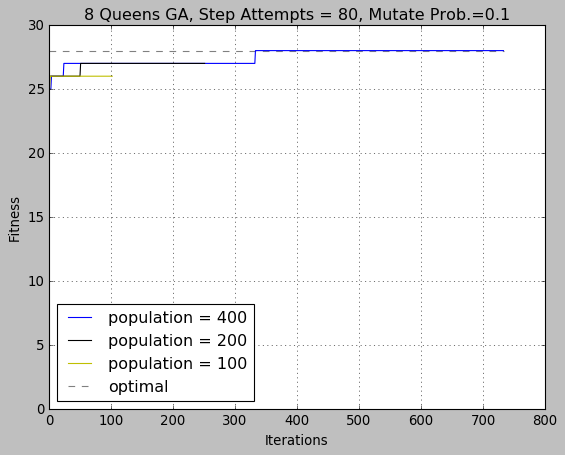

In [163]:
all_curve = []
for a in p_size:
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = a, mutation_prob = mut_prob[1],
                                                      max_attempts = a, max_iters = 5000,
                                                      curve = True, random_state = 1)
    all_curve.append(fitness_curve)
    print('The best state found with {} step attempts took {} iterations.'.format(a, len(fitness_curve)))
    print('The fitness found at the best state with max of {} step attempts is: '.format(a), best_fitness)
    if len(fitness_curve) > length:
        length = len(fitness_curve)

plt.style.use('classic')
#plt.plot(all_curve[4], color='green', label='160 max step attempts')
#plt.plot(all_curve[3], color = 'red', label='80 max step attempts')
plt.plot(all_curve[2], color='blue', label='population = 400')
plt.plot(all_curve[1], color = 'black', label='population = 200')
plt.plot(all_curve[0], color='y', label='population = 100')
plt.hlines(28, 0, xmax=length, color='grey', label='optimal', linestyle='dashed')
plt.legend(loc='best')
ax = plt.axes()
ax.grid()
ax.set_ylim([0,30])
plt.title('8 Queens GA, Step Attempts = 80, Mutate Prob.=0.1')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig("Q8_RHC_Pop")

The best state found with 0.05 step attempts took 143 iterations.
The fitness found at the best state with max of 0.05 step attempts is:  28.0
The best state found with 0.1 step attempts took 132 iterations.
The fitness found at the best state with max of 0.1 step attempts is:  27.0
The best state found with 0.15 step attempts took 115 iterations.
The fitness found at the best state with max of 0.15 step attempts is:  27.0
The best state found with 0.2 step attempts took 119 iterations.
The fitness found at the best state with max of 0.2 step attempts is:  27.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


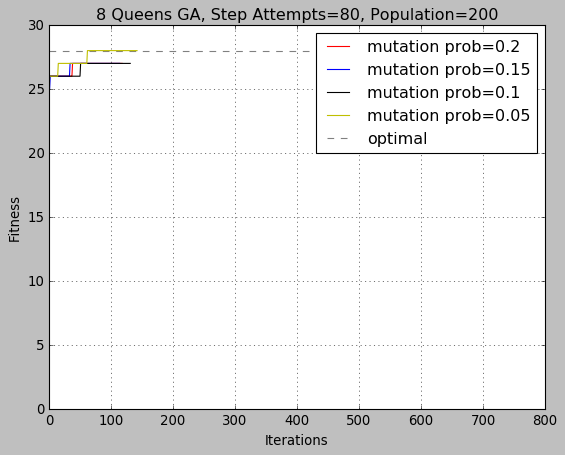

In [164]:
all_curve = []
for a in mut_prob:
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = p_size[1], mutation_prob = a,
                                                      max_attempts = step_attempts[3], max_iters = 5000,
                                                      curve = True, random_state = 1)
    all_curve.append(fitness_curve)
    print('The best state found with {} step attempts took {} iterations.'.format(a, len(fitness_curve)))
    print('The fitness found at the best state with max of {} step attempts is: '.format(a), best_fitness)
    if len(fitness_curve) > length:
        length = len(fitness_curve)

plt.style.use('classic')
#plt.plot(all_curve[4], color='green', label='160 max step attempts')
plt.plot(all_curve[3], color = 'red', label='mutation prob=0.2')
plt.plot(all_curve[2], color='blue', label='mutation prob=0.15')
plt.plot(all_curve[1], color = 'black', label='mutation prob=0.1')
plt.plot(all_curve[0], color='y', label='mutation prob=0.05')
plt.hlines(28, 0, xmax=length, color='grey', label='optimal', linestyle='dashed')
plt.legend(loc='best')
ax = plt.axes()
ax.grid()
ax.set_ylim([0,30])
plt.title('8 Queens GA, Step Attempts=80, Population=200')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig("Q8_GA_Mut")

The best state found with 100 step attempts took 44 iterations.
The fitness found at the best state with max of 100 step attempts is:  26.0
The best state found with 200 step attempts took 41 iterations.
The fitness found at the best state with max of 200 step attempts is:  27.0
The best state found with 400 step attempts took 48 iterations.
The fitness found at the best state with max of 400 step attempts is:  28.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


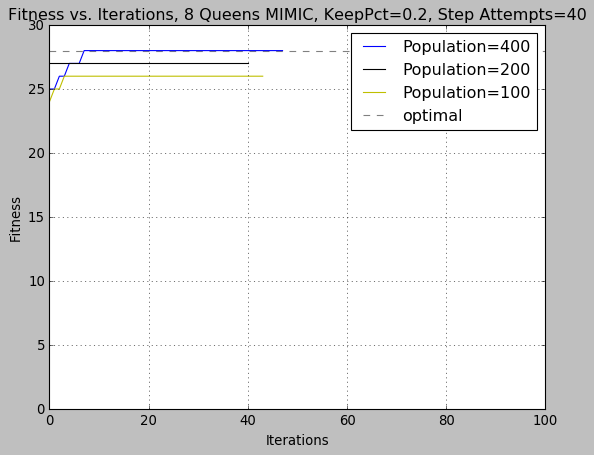

In [184]:
# 8Q MIMIC
step_attempts = [10, 20, 40]
p_size = [100, 200, 400]
keep = [0.1, 0.2, 0.4]
all_curve = []
for a in p_size:
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem, keep_pct=0.2,
                                                      max_attempts = 40, max_iters = 3000, pop_size=a,
                                                      curve = True, random_state = 1, fast_mimic=True)
    all_curve.append(fitness_curve)
    print('The best state found with {} step attempts took {} iterations.'.format(a, len(fitness_curve)))
    print('The fitness found at the best state with max of {} step attempts is: '.format(a), best_fitness)

plt.style.use('classic')
#plt.plot(all_curve[4], color='green', label='100 max step attempts')
#plt.plot(all_curve[3], color = 'red', label='50 max step attempts')
plt.plot(all_curve[2], color='blue', label='Population=400')
plt.plot(all_curve[1], color = 'black', label='Population=200')
plt.plot(all_curve[0], color='y', label='Population=100')
plt.hlines(28, 0, xmax=length, color='grey', label='optimal', linestyle='dashed')
plt.legend(loc='best')
ax = plt.axes()
ax.grid()
ax.set_ylim([0,30])
ax.set_xlim([0,100])
plt.title('Fitness vs. Iterations, 8 Queens MIMIC, KeepPct=0.2, Step Attempts=40')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig("Q8_MIMIC_Pop")
#print(all_curve[0])

In [222]:
# 4 PEAKS
fitness = mlrose.FourPeaks(t_pct=0.1)
problem = mlrose.DiscreteOpt(length = 12, fitness_fn = fitness,
                             maximize = True, max_val = 2)
init_state = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
fitness.evaluate(np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]))

21

The best state found with 10 step attempts took 23 iterations.
The fitness found at the best state with max of 10 step attempts is:  11.0
The best state found with 20 step attempts took 54 iterations.
The fitness found at the best state with max of 20 step attempts is:  21.0
The best state found with 40 step attempts took 166 iterations.
The fitness found at the best state with max of 40 step attempts is:  21.0
The best state found with 80 step attempts took 206 iterations.
The fitness found at the best state with max of 80 step attempts is:  21.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


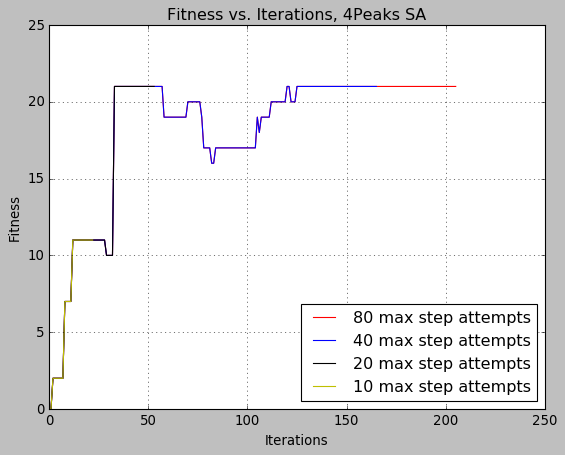

In [206]:
#4peaks SA
schedule = mlrose.ExpDecay()
step_attempts = [10, 20, 40, 80]
all_curve = []
for a in step_attempts:
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = a, max_iters = 5000,
                                                      init_state = init_state, curve = True, random_state = 1)
    all_curve.append(fitness_curve)
    print('The best state found with {} step attempts took {} iterations.'.format(a, len(fitness_curve)))
    print('The fitness found at the best state with max of {} step attempts is: '.format(a), best_fitness)
    print

plt.style.use('classic')
#plt.plot(all_curve[4], color='green', label='100 max step attempts')
plt.plot(all_curve[3], color = 'red', label='80 max step attempts')
plt.plot(all_curve[2], color='blue', label='40 max step attempts')
plt.plot(all_curve[1], color = 'black', label='20 max step attempts')
plt.plot(all_curve[0], color='y', label='10 max step attempts')
plt.legend(loc='best')
ax=plt.axes()
ax.grid()
plt.title('Fitness vs. Iterations, 4Peaks SA')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig("4P_SA")

The best state found with 10 step attempts took 114 iterations.
The fitness found at the best state with max of 10 step attempts is:  6.0
The best state found with 20 step attempts took 304 iterations.
The fitness found at the best state with max of 20 step attempts is:  12.0
The best state found with 40 step attempts took 458 iterations.
The fitness found at the best state with max of 40 step attempts is:  12.0
The best state found with 200 step attempts took 1583 iterations.
The fitness found at the best state with max of 200 step attempts is:  12.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


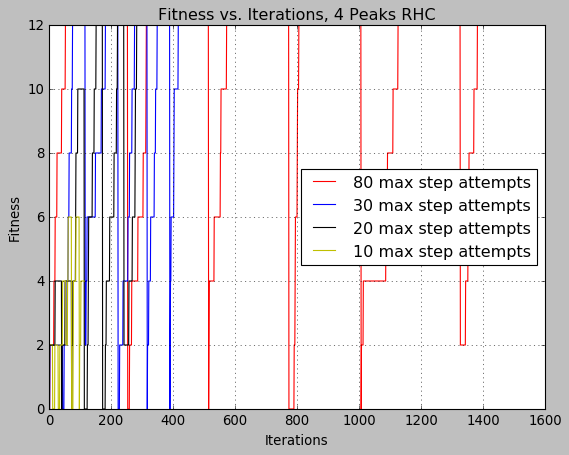

In [216]:
# 4peaks RHC
step_attempts = [10, 20, 40, 200]
all_curve = []
for a in step_attempts:
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem,
                                                      max_attempts = a, max_iters = 5000, restarts = 5,
                                                      init_state = init_state, curve = True, random_state = None)
    all_curve.append(fitness_curve)
    print('The best state found with {} step attempts took {} iterations.'.format(a, len(fitness_curve)))
    print('The fitness found at the best state with max of {} step attempts is: '.format(a), best_fitness)

plt.style.use('classic')
#plt.plot(all_curve[4], color='green', label='100 max step attempts')
plt.plot(all_curve[3], color = 'red', label='80 max step attempts')
plt.plot(all_curve[2], color='blue', label='30 max step attempts')
plt.plot(all_curve[1], color = 'black', label='20 max step attempts')
plt.plot(all_curve[0], color='y', label='10 max step attempts')
plt.legend(loc='best')
ax = plt.axes()
ax.grid()
plt.title('Fitness vs. Iterations, 4 Peaks RHC')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig("4P_RHC")

The best state found with 100 step attempts took 43 iterations.
The fitness found at the best state with max of 100 step attempts is:  21.0
The best state found with 200 step attempts took 41 iterations.
The fitness found at the best state with max of 200 step attempts is:  21.0
The best state found with 400 step attempts took 42 iterations.
The fitness found at the best state with max of 400 step attempts is:  21.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


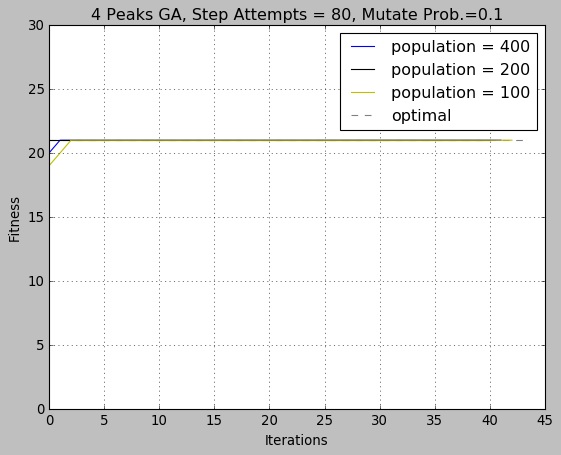

In [242]:
# 4Peaks GA
step_attempts = [10, 20, 40, 80, 160]
length = 0
p_size = [100, 200, 400]
mut_prob = [0.05, 0.1, 0.15, 0.2]
all_curve = []
for a in p_size:
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = a, mutation_prob = 0.1,
                                                      max_attempts = 40, max_iters = 5000,
                                                      curve = True, random_state = 1)
    all_curve.append(fitness_curve)
    print('The best state found with {} step attempts took {} iterations.'.format(a, len(fitness_curve)))
    print('The fitness found at the best state with max of {} step attempts is: '.format(a), best_fitness)
    if len(fitness_curve) > length:
        length = len(fitness_curve)

plt.style.use('classic')
#plt.plot(all_curve[4], color='green', label='160 max step attempts')
#plt.plot(all_curve[3], color = 'red', label='80 max step attempts')
plt.plot(all_curve[2], color='blue', label='population = 400')
plt.plot(all_curve[1], color = 'black', label='population = 200')
plt.plot(all_curve[0], color='y', label='population = 100')
plt.hlines(21, 0, xmax=length, color='grey', label='optimal', linestyle='dashed')
plt.legend(loc='best')
ax = plt.axes()
ax.grid()
ax.set_ylim([0,30])
plt.title('4 Peaks GA, Step Attempts = 80, Mutate Prob.=0.1')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig("4P_GA_Pop")

The best state found with 0.1 step attempts took 22 iterations.
The fitness found at the best state with max of 0.1 step attempts is:  12.0
The best state found with 0.2 step attempts took 22 iterations.
The fitness found at the best state with max of 0.2 step attempts is:  12.0
The best state found with 0.5 step attempts took 22 iterations.
The fitness found at the best state with max of 0.5 step attempts is:  21.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


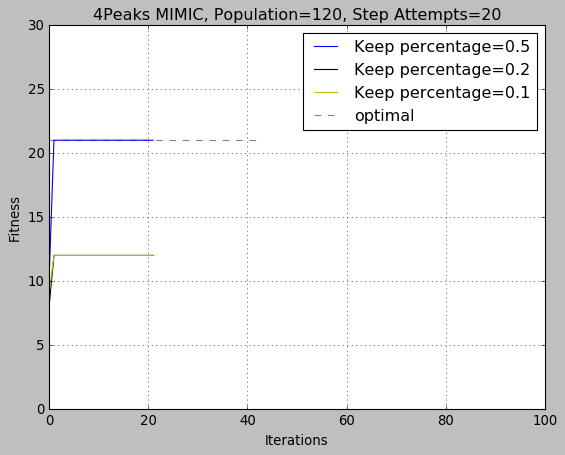

In [240]:
# 4 Peaks MIMIC
step_attempts = [10, 20, 40]
p_size = [40, 80, 160]
keep = [0.1, 0.2, 0.5]
all_curve = []
for a in keep:
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem, keep_pct=a,
                                                      max_attempts = 20, max_iters = 3000, pop_size=120,
                                                      curve = True, random_state = 1, fast_mimic=True)
    all_curve.append(fitness_curve)
    print('The best state found with {} step attempts took {} iterations.'.format(a, len(fitness_curve)))
    print('The fitness found at the best state with max of {} step attempts is: '.format(a), best_fitness)

plt.style.use('classic')
#plt.plot(all_curve[4], color='green', label='100 max step attempts')
#plt.plot(all_curve[3], color = 'red', label='50 max step attempts')
plt.plot(all_curve[2], color='blue', label='Keep percentage=0.5')
plt.plot(all_curve[1], color = 'black', label='Keep percentage=0.2')
plt.plot(all_curve[0], color='y', label='Keep percentage=0.1')
plt.hlines(21, 0, xmax=length, color='grey', label='optimal', linestyle='dashed')
plt.legend(loc='best')
ax = plt.axes()
ax.grid()
ax.set_ylim([0,30])
ax.set_xlim([0,100])
plt.title('4Peaks MIMIC, Population=120, Step Attempts=20')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig("4P_MIMIC_Keep")
#print(all_curve[0])

In [244]:
#FlipFlop
fitness = mlrose.FlipFlop()
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness,
                             maximize = True, max_val = 2)
init_state = np.zeros(20)
fitness.evaluate(init_state)

0

The best state found with 10 step attempts took 131 iterations.
The fitness found at the best state with max of 10 step attempts is:  17.0
The best state found with 20 step attempts took 568 iterations.
The fitness found at the best state with max of 20 step attempts is:  19.0
The best state found with 40 step attempts took 588 iterations.
The fitness found at the best state with max of 40 step attempts is:  19.0
The best state found with 80 step attempts took 628 iterations.
The fitness found at the best state with max of 80 step attempts is:  19.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


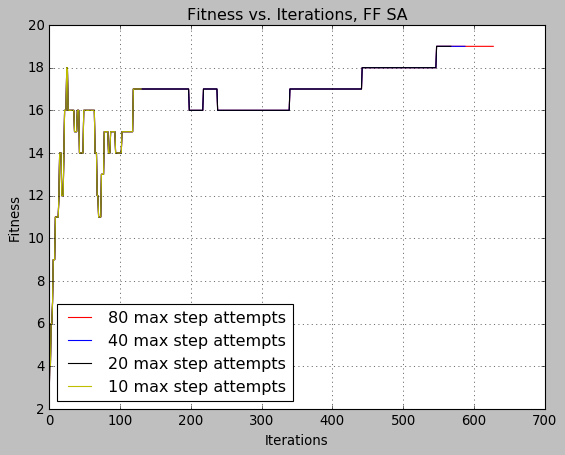

In [245]:
#FF SA
schedule = mlrose.ExpDecay()
step_attempts = [10, 20, 40, 80]
all_curve = []
for a in step_attempts:
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = a, max_iters = 5000,
                                                      init_state = init_state, curve = True, random_state = 1)
    all_curve.append(fitness_curve)
    print('The best state found with {} step attempts took {} iterations.'.format(a, len(fitness_curve)))
    print('The fitness found at the best state with max of {} step attempts is: '.format(a), best_fitness)
    print

plt.style.use('classic')
#plt.plot(all_curve[4], color='green', label='100 max step attempts')
plt.plot(all_curve[3], color = 'red', label='80 max step attempts')
plt.plot(all_curve[2], color='blue', label='40 max step attempts')
plt.plot(all_curve[1], color = 'black', label='20 max step attempts')
plt.plot(all_curve[0], color='y', label='10 max step attempts')
plt.legend(loc='best')
ax=plt.axes()
ax.grid()
plt.title('Fitness vs. Iterations, FF SA')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig("FF_SA")

The best state found with 10 step attempts took 156 iterations.
The fitness found at the best state with max of 10 step attempts is:  17.0
The best state found with 20 step attempts took 257 iterations.
The fitness found at the best state with max of 20 step attempts is:  19.0
The best state found with 40 step attempts took 458 iterations.
The fitness found at the best state with max of 40 step attempts is:  19.0
The best state found with 80 step attempts took 664 iterations.
The fitness found at the best state with max of 80 step attempts is:  19.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


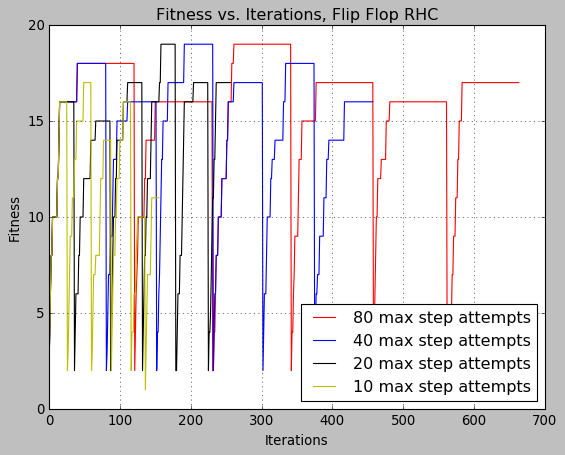

In [251]:
# FF RHC
step_attempts = [10, 20, 40, 80]
all_curve = []
for a in step_attempts:
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem,
                                                      max_attempts = a, max_iters = 5000, restarts = 5,
                                                      init_state = init_state, curve = True, random_state = 4)
    all_curve.append(fitness_curve)
    print('The best state found with {} step attempts took {} iterations.'.format(a, len(fitness_curve)))
    print('The fitness found at the best state with max of {} step attempts is: '.format(a), best_fitness)

plt.style.use('classic')
#plt.plot(all_curve[4], color='green', label='100 max step attempts')
plt.plot(all_curve[3], color = 'red', label='80 max step attempts')
plt.plot(all_curve[2], color='blue', label='40 max step attempts')
plt.plot(all_curve[1], color = 'black', label='20 max step attempts')
plt.plot(all_curve[0], color='y', label='10 max step attempts')
plt.legend(loc='best')
ax = plt.axes()
ax.grid()
plt.title('Fitness vs. Iterations, Flip Flop RHC')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig("FF_RHC")

The best state found with 0.05 step attempts took 67 iterations.
The fitness found at the best state with max of 0.05 step attempts is:  19.0
The best state found with 0.1 step attempts took 65 iterations.
The fitness found at the best state with max of 0.1 step attempts is:  18.0
The best state found with 0.15 step attempts took 57 iterations.
The fitness found at the best state with max of 0.15 step attempts is:  18.0
The best state found with 0.2 step attempts took 46 iterations.
The fitness found at the best state with max of 0.2 step attempts is:  17.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


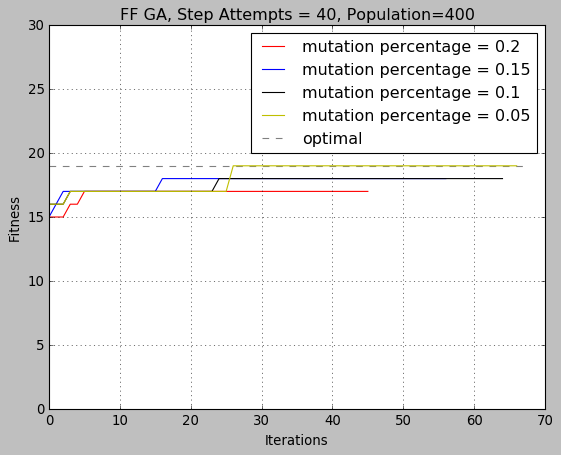

In [267]:
# FF GA
step_attempts = [10, 20, 40, 80, 160]
length = 0
p_size = [100, 200, 400]
mut_prob = [0.05, 0.1, 0.15, 0.2]
all_curve = []
for a in mut_prob:
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = 400, mutation_prob = a,
                                                      max_attempts = 40, max_iters = 5000,
                                                      curve = True, random_state = 1)
    all_curve.append(fitness_curve)
    print('The best state found with {} step attempts took {} iterations.'.format(a, len(fitness_curve)))
    print('The fitness found at the best state with max of {} step attempts is: '.format(a), best_fitness)
    if len(fitness_curve) > length:
        length = len(fitness_curve)

plt.style.use('classic')
#plt.plot(all_curve[4], color='green', label='160 max step attempts')
plt.plot(all_curve[3], color = 'red', label='mutation percentage = 0.2')
plt.plot(all_curve[2], color='blue', label='mutation percentage = 0.15')
plt.plot(all_curve[1], color = 'black', label='mutation percentage = 0.1')
plt.plot(all_curve[0], color='y', label='mutation percentage = 0.05')
plt.hlines(19, 0, xmax=length, color='grey', label='optimal', linestyle='dashed')
plt.legend(loc='best')
ax = plt.axes()
ax.grid()
ax.set_ylim([0,30])
plt.title('FF GA, Step Attempts = 40, Population=400')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig("FF_GA_Mut")

The best state found with 0.1 step attempts took 26 iterations.
The fitness found at the best state with max of 0.1 step attempts is:  19.0
The best state found with 0.2 step attempts took 29 iterations.
The fitness found at the best state with max of 0.2 step attempts is:  19.0
The best state found with 0.5 step attempts took 23 iterations.
The fitness found at the best state with max of 0.5 step attempts is:  17.0


C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


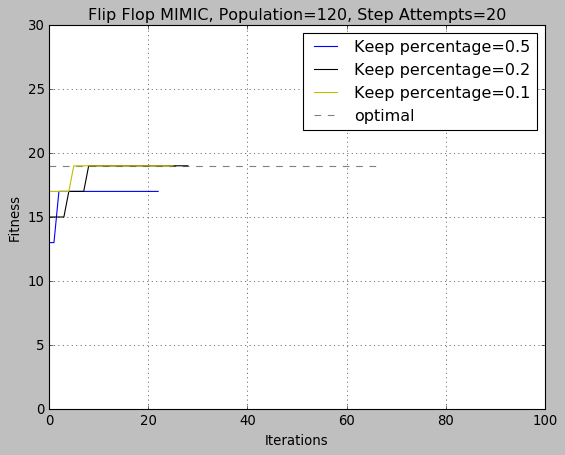

In [269]:
# FF MIMIC
step_attempts = [10, 20, 40]
p_size = [40, 80, 160]
keep = [0.1, 0.2, 0.5]
all_curve = []
for a in keep:
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem, keep_pct=a,
                                                      max_attempts = 20, max_iters = 3000, pop_size=120,
                                                      curve = True, random_state = 1, fast_mimic=True)
    all_curve.append(fitness_curve)
    print('The best state found with {} step attempts took {} iterations.'.format(a, len(fitness_curve)))
    print('The fitness found at the best state with max of {} step attempts is: '.format(a), best_fitness)

plt.style.use('classic')
#plt.plot(all_curve[4], color='green', label='100 max step attempts')
#plt.plot(all_curve[3], color = 'red', label='50 max step attempts')
plt.plot(all_curve[2], color='blue', label='Keep percentage=0.5')
plt.plot(all_curve[1], color = 'black', label='Keep percentage=0.2')
plt.plot(all_curve[0], color='y', label='Keep percentage=0.1')
plt.hlines(19, 0, xmax=length, color='grey', label='optimal', linestyle='dashed')
plt.legend(loc='best')
ax = plt.axes()
ax.grid()
ax.set_ylim([0,30])
ax.set_xlim([0,100])
plt.title('Flip Flop MIMIC, Population=120, Step Attempts=20')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig("FF_MIMIC_Keep")
#print(all_curve[0])